In [76]:
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings(action="ignore")

In [77]:
ess = pd.read_csv('ESSdata.csv')
print(ess.info())
ess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB
None


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Questions

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3. Who reported watching more TV in 2012, men or women?

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [78]:
null_columns = ess.columns[ess.isnull().any()]
ess[null_columns].isnull().sum()

tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [79]:
# Creating dataframes for each country and removing rows with any nulls
ess.dropna(how='all', inplace=True)
es = ess[ess['cntry'] == 'ES'].sort_values(by=['year']).dropna(how='all')
se = ess[ess['cntry'] == 'SE'].sort_values(by=['year']).dropna(how='all')
ch = ess[ess['cntry'] == 'CH'].sort_values(by=['year']).dropna(how='all')
no = ess[ess['cntry'] == 'NO'].sort_values(by=['year']).dropna(how='all')
cz = ess[ess['cntry'] == 'CZ'].sort_values(by=['year']).dropna(how='all')
de = ess[ess['cntry'] == 'DE'].sort_values(by=['year']).dropna(how='all')

# Creating lists of each country's trust values
es_trust = es.ppltrst
se_trust = se.ppltrst
ch_trust = ch.ppltrst
no_trust = no.ppltrst
cz_trust = cz.ppltrst
de_trust = de.ppltrst


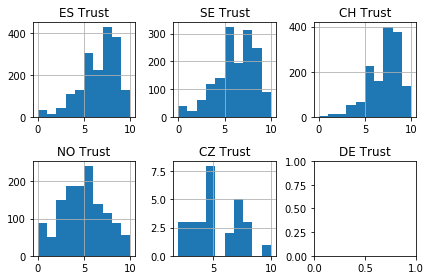

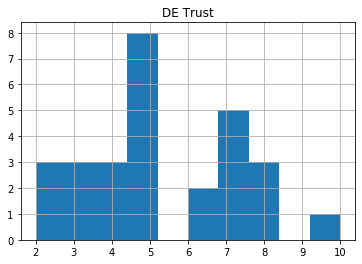

In [20]:
es_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 1)
plt.title('ES Trust')

se_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)

plt.subplot(2, 3, 2)
plt.title('SE Trust')

ch_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 3)
plt.title('CH Trust')

no_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 4)
plt.title('NO Trust')

cz_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 5)
plt.title('CZ Trust')

de_trust.hist()
plt.subplot(2, 3, 6)
plt.title('DE Trust')
plt.show()

de_trust.hist()
plt.title('DE Trust')
plt.show()

The data does not appear to have a distribution with mathematical properties, so I'll use the Kruskal-Wallis test to determine whether changes in trust were significant.

In [41]:
ess.year.value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [23]:
def rank_kruskal_comparison_test(df, column_of_interest):
    df_2012 = df[df['year'] == 6] 
    df_2012 = df_2012[[column_of_interest]]
    print(df_2012.head())
    df_2012_length = len(df_2012)
    print(df_2012_length)
    df_2014 = df[df['year'] == 7]
    df_2014 = df_2014[[column_of_interest]]
    print(df_2014.head())
    df_2014_length = len(df_2014)
    print(df_2014_length)
    ranks = stats.rankdata(df_2012 + df_2014)
    print('Ranks:', ranks[:10])
    
    # Create a new dataframe of ranks
    new_df = pd.DataFrame()
    new_df['Ranks_2012'] = ranks[0:df_2012_length]
    new_df['Ranks_2014'] = ranks[df_2012_length:]
    print(new_df.head())
                       
    # Average rank per group.
    groups = ['Ranks_2012', 'Ranks_2014']
    print(new_df[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(
        new_df['Ranks_2012'],
        new_df['Ranks_2014']))

In [24]:
kruskal_comparison_test(es)
print('\n')
kruskal_comparison_test(se)
print('\n')
kruskal_comparison_test(ch)
print('\n')
kruskal_comparison_test(no)
print('\n')
kruskal_comparison_test(cz)
print('\n')
kruskal_comparison_test(de)

1213 1213


ValueError: Length of values does not match length of index

In [51]:
es_2012 = es[es['year'] == 6]
es_2014 = es[es['year'] == 7]
ranks = stats.rankdata(es_2012 + es_2014)

# Create a new dataframe of ranks
new_es = pd.DataFrame()
new_es['Ranks_2012'] = ranks[0:4297]
new_es['Ranks_2014'] = ranks[4297:8594]
                       
# Average rank per group.
groups = ['Ranks_2012', 'Ranks_2014']
print(new_es[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    new_es['Ranks_2012'],
    new_es['Ranks_2014'])                  

Ranks_2012    21292.716081
Ranks_2014    19662.849430
dtype: float64
15769.5


KruskalResult(statistic=2111.859274680548, pvalue=0.0)

In [48]:
es_2012 = es[es['year'] == 6]
es_2014 = es[es['year'] == 7]
ranks = stats.rankdata(es_2012 + es_2014)

# Create a new dataframe of ranks
new_es = pd.DataFrame()
new_es['Ranks_2012'] = ranks[0:4297]
new_es['Ranks_2014'] = ranks[4297:8594]
                       
# Average rank per group.
groups = ['Ranks_2012', 'Ranks_2014']
print(new_es[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    new_es['Ranks_2012'],
    new_es['Ranks_2014'])                  

Ranks_2012    21292.716081
Ranks_2014    19662.849430
dtype: float64
15769.5


KruskalResult(statistic=2111.859274680548, pvalue=0.0)

In [4]:
# As the distributions do not appear to have known mathematical properties, I'll use the Kruskal-Wallis test.

 

def no_rank_kruskal_comparison_test(df, column_of_interest):
    df_2012 = df[df['year'] == 6] # dataframe of just year 2012
    df_2012 = df_2012[[column_of_interest]] # dataframe of column of interest in 2012
    list_2012 = df_2012[column_of_interest].tolist() # converting column of interest to list
    print(type(list_2012), list_2012[:5])

    df_2014 = df[df['year'] == 7] # dataframe of just year 2014
    df_2014 = df_2014[[column_of_interest]] # dataframe of column of interest in 2014
    list_2014 = df_2014[column_of_interest].tolist() # converting column of interest to list
    print(df_2014.head())

 
    # Create a new dataframe of values
    new_df = pd.DataFrame()
    new_df['2012'] = list_2012
    new_df['2014'] = list_2014
    print('\n New DataFrame Head: \n', new_df.head())

                      
    # Average value/rating per group.
    groups = ['2012', '2014']
    print(new_df[groups].apply(np.mean))

   # Print the test statistic followed by the probability of getting this result
  # if the groups were not different.
    print(stats.kruskal(
        new_df['2012'],
        new_df['2014']))

In [7]:
print('ES Comparison Test for Happy')
no_rank_kruskal_comparison_test(es, 'happy')
print('\n')

print('ES Comparison Test for Trust')
no_rank_kruskal_comparison_test(es, 'ppltrst')

ES Comparison Test for Happy
<class 'list'> [9.0, 7.0, 9.0, 10.0, 6.0]
      happy
4910    6.0
4914    8.0
4913    9.0
4912   10.0
4911   10.0

 New DataFrame Head: 
    2012  2014
0   9.0   6.0
1   7.0   8.0
2   9.0   9.0
3  10.0  10.0
4   6.0  10.0
2012    7.548680
2014    7.419967
dtype: float64
KruskalResult(statistic=nan, pvalue=nan)


ES Comparison Test for Trust
<class 'list'> [3.0, 3.0, 3.0, 5.0, 4.0]
      ppltrst
4910      1.0
4914      1.0
4913      8.0
4912      8.0
4911      7.0

 New DataFrame Head: 
    2012  2014
0   3.0   1.0
1   3.0   1.0
2   3.0   8.0
3   5.0   8.0
4   4.0   7.0
2012    5.114592
2014    4.895128
dtype: float64
KruskalResult(statistic=nan, pvalue=nan)


In [8]:
for df in [es, se, ch, no, cz, de]:
    no_rank_kruskal_comparison_test(df, 'happy')

<class 'list'> [9.0, 7.0, 9.0, 10.0, 6.0]
      happy
4910    6.0
4914    8.0
4913    9.0
4912   10.0
4911   10.0

 New DataFrame Head: 
    2012  2014
0   9.0   6.0
1   7.0   8.0
2   9.0   9.0
3  10.0  10.0
4   6.0  10.0
2012    7.548680
2014    7.419967
dtype: float64
KruskalResult(statistic=nan, pvalue=nan)
<class 'list'> [5.0, 7.0, 9.0, 8.0, 9.0]
      happy
8292    8.0
8291    9.0
8290    9.0
8289    5.0
8283   10.0

 New DataFrame Head: 
    2012  2014
0   5.0   8.0
1   7.0   9.0
2   9.0   9.0
3   8.0   5.0
4   9.0  10.0
2012    7.907387
2014    7.946961
dtype: float64
KruskalResult(statistic=nan, pvalue=nan)
<class 'list'> [8.0, 8.0, 7.0, 8.0, 9.0]
      happy
1289    9.0
1288    9.0
1287    8.0
1282   10.0
1285    9.0

 New DataFrame Head: 
    2012  2014
0   8.0   9.0
1   8.0   9.0
2   7.0   8.0
3   8.0  10.0
4   9.0   9.0
2012    8.088312
2014    8.116429
dtype: float64
KruskalResult(statistic=nan, pvalue=nan)
<class 'list'> [8.0, 10.0, 8.0, 9.0, 9.0]
      happy
6537    8.0


Who reported watching more TV in 2012, men or women?

In [25]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [80]:
women = ess[ess['gndr'] == 2].dropna(how='all')
women_2012 = women[women['year'] == 6]
women_2012_tv = women_2012[['tvtot']]

men = ess[ess['gndr'] == 1].dropna(how='all')
men_2012 = men[men['year'] == 6]
men_2012_tv = men_2012[['tvtot']]

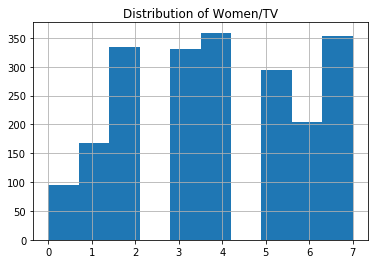

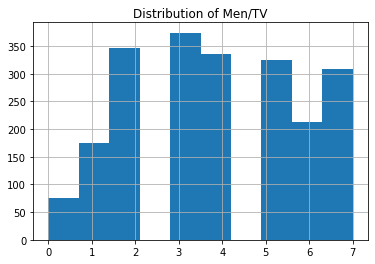

In [82]:
women_2012_tv.hist()
plt.title('Distribution of Women/TV')
plt.show()


men_2012_tv.hist()
plt.title('Distribution of Men/TV')
plt.show()

The distributions don't appear to have any mathematical proprties, so I'll use Mood's Median test to compare the groups. 

In [91]:
# Converting the columns into arrays

wtv = list(women_2012_tv['tvtot'])
mtv = list(men_2012_tv['tvtot'])
print(sum(wtv))
print('Women\'s Average:', sum(wtv)/len(mtv))
print('Men\' Average:', sum(mtv)/len(mtv))
# Running Mood's Median Test
stats.median_test(wtv, mtv)

nan
Women's Average: nan
Men' Average: nan


(nan, nan, nan, None)

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [92]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [111]:
partners = ess[(ess['partner'] == 1)]
partners_pplfair = partners['pplfair']

no_partners = ess[(ess['partner'] == 2)]
no_partners_pplfair = no_partners['pplfair']


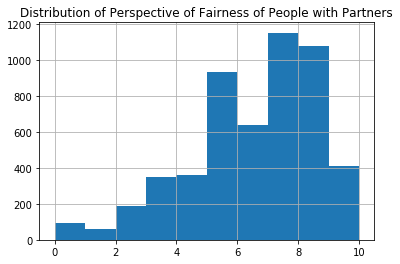

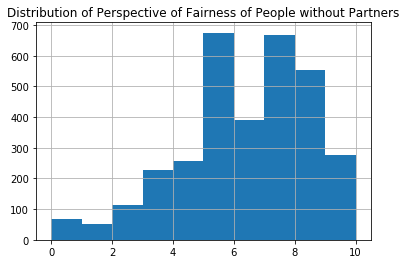

In [112]:
partners_pplfair.hist()
plt.title('Distribution of Perspective of Fairness of People with Partners')
plt.show()

no_partners_pplfair.hist()
plt.title('Distribution of Perspective of Fairness of People without Partners')
plt.show()

Both sets of data are quite skewed to the left. These are two independent groups, so I will utilize a non-parametric test, the Mann-Whitney U.

In [113]:
partners_pplfair = partners_pplfair.tolist()
no_partners_pplfair = no_partners_pplfair.tolist()

print('Average Rating of Fairness for People with Partners:', sum(partners_pplfair)/len(partners_pplfair))
print('Average Rating of Fairness for People without Partners:', sum(no_partners_pplfair)/len(no_partners_pplfair))
stats.mannwhitneyu(partners_pplfair, no_partners_pplfair)

Average Rating of Fairness for People with Partners: nan
Average Rating of Fairness for People without Partners: nan


MannwhitneyuResult(statistic=8329142.0, pvalue=0.0002907131641946532)

The test statistic is high and the p-value is just under 0.0003, indicating there's a 0.03% chance for the difference in means if there was no difference between the groups. 

4. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [125]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [145]:
year_2014 = ess[ess['year'] == 7]
countries = ['SE', 'ES', 'DE', 'CZ']
year_2014_countries = year_2014[year_2014.cntry.isin(countries)]
year_2014_countries.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2204,CZ,1001.0,7,5.0,3.0,3.0,2.0,7.0,4.0,4.0,2.0,71.0,2.0
2205,CZ,1002.0,7,5.0,5.0,7.0,3.0,5.0,5.0,1.0,2.0,52.0,1.0
2206,CZ,1003.0,7,7.0,5.0,4.0,3.0,6.0,4.0,3.0,1.0,55.0,2.0
2207,CZ,1004.0,7,7.0,5.0,5.0,3.0,7.0,4.0,3.0,1.0,64.0,1.0
2208,CZ,1005.0,7,3.0,4.0,5.0,5.0,6.0,5.0,3.0,1.0,59.0,1.0


In [146]:
se = year_2014_countries[year_2014_countries['cntry'] =='SE']
se_sclmeet = se.sclmeet
se_sclmeet_list = se_sclmeet.tolist()

es = year_2014_countries[year_2014_countries['cntry'] =='ES']
es_sclmeet = es.sclmeet
es_sclmeet_list = es_sclmeet.tolist()

de = year_2014_countries[year_2014_countries['cntry'] =='DE']
de_sclmeet = de.sclmeet
de_sclmeet_list = de_sclmeet.tolist()

cz = year_2014_countries[year_2014_countries['cntry'] =='CZ']
cz_sclmeet = cz.sclmeet
cz_sclmeet_list = cz_sclmeet.tolist()

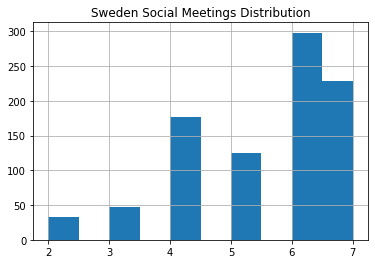

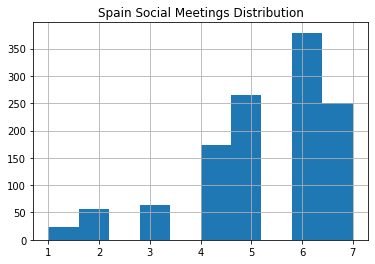

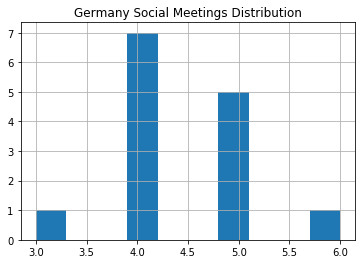

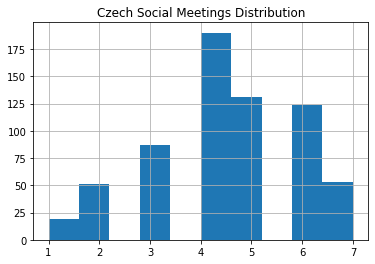

In [147]:
se_sclmeet.hist()
plt.title('Sweden Social Meetings Distribution')
plt.show()

es_sclmeet.hist()
plt.title('Spain Social Meetings Distribution')
plt.show()

de_sclmeet.hist()
plt.title('Germany Social Meetings Distribution')
plt.show()

cz_sclmeet.hist()
plt.title('Czech Social Meetings Distribution')
plt.show()


Definitely no distributions with mathematical properties, so I'll use Mood's Median test to compare the groups.

In [150]:
sclmeet_df = pd.DataFrame()

ranks = stats.rankdata(se_sclmeet_list + es_sclmeet_list + de_sclmeet_list + cz_sclmeet_list)
for country in [se_sclmeet_list, es_sclmeet_list, de_sclmeet_list, cz_sclmeet_list]:
    name = str(country)
    print(name, country.apply(np.mean))

stats.median_test(se_sclmeet_list, es_sclmeet_list, de_sclmeet_list, cz_sclmeet_list)

AttributeError: 'list' object has no attribute 'apply'

5. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?